<a href="https://colab.research.google.com/github/gunjan238/ML_Project1/blob/master/TATA_Motors_Close_Price_Prediction_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing The Neccesary Libraries

In [ ]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import plotly
import cufflinks as cf
cf.go_offline()
import warnings
import plotly.graph_objects as go
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression

# Extracting The Data 

The stock data of TATA Motors was obtained using the yfinance module, covering the time period from 1999 to 2023. The data was then extracted and stored for further analysis.

In [ ]:
start_date = '2013-01-01'
end_date = '2023-04-28'
ticker = 'TATAMOTORS.NS'

df = yf.download(ticker, start=start_date, end=end_date)
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-01,312.646545,314.922150,311.162476,313.388580,309.819305,3980484
2013-01-02,315.120026,317.544037,312.893890,314.625336,311.041992,6929285
2013-01-03,316.604095,318.335541,313.784363,314.724274,311.139771,6165017
2013-01-04,315.120026,315.120026,309.876282,312.052917,308.498840,8965650
2013-01-07,314.427460,315.218964,309.282623,309.925751,306.395874,4943021


# Data Exploration

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2546 entries, 2013-01-01 to 2023-04-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2546 non-null   float64
 1   High       2546 non-null   float64
 2   Low        2546 non-null   float64
 3   Close      2546 non-null   float64
 4   Adj Close  2546 non-null   float64
 5   Volume     2546 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 139.2 KB


In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2546.000000,2546.000000,2546.000000,2546.000000,2546.000000,2.546000e+03
mean,349.083679,353.962056,343.527834,348.479069,348.094652,2.197724e+07
std,128.630058,129.689817,127.266831,128.434687,128.447705,2.991226e+07
min,66.500000,66.900002,63.500000,65.300003,65.300003,0.000000e+00
25%,270.125000,273.676407,264.808441,268.093483,267.500000,6.350983e+06
50%,378.725006,382.597870,373.024994,377.024994,376.548752,1.045346e+07
75%,446.000000,450.799988,439.496521,445.387497,445.152260,2.478157e+07
max,600.212097,605.901123,589.873047,598.134399,597.892273,3.905778e+08


# Exploratory Data Analysis

- Mean: The average value of the opening or closing prices. A high mean value suggests that the stock is generally expensive, while a low mean value suggests that it is generally inexpensive.
- Median: The middle value of the opening or closing prices. It represents the typical value of the stock prices and is less sensitive to outliers than the mean.
- Standard Deviation: The measure of the spread of the opening or closing prices. A high standard deviation suggests that the stock prices are widely spread out, while a low standard deviation suggests that they are tightly clustered around the mean.
- Maximum and Minimum values: The highest and lowest values of the opening or closing prices, respectively. These values provide information about the range of the stock prices and whether there have been any drastic changes in the stock price over time.

In [ ]:
# Average,Median, STd , max  and min of Closing Price
print("Mean of closing price: ", df['Close'].mean())
print("Median of closing price: ", df['Close'].median())
print("Standard deviation of closing price: ", df['Close'].std())
print("Maximum value Of closing price: ",df['Close'].max())
print("Mininum value Of closing price: ",df['Close'].min())

Mean of closing price:  348.47906850438744
Median of closing price:  377.0249938964844
Standard deviation of closing price:  128.43468710618652
Maximum value Of closing price:  598.1343994140625
Mininum value Of closing price:  65.30000305175781


In [ ]:
# Average,Median, STd , max  and min of Open Price 
print("Mean of Opening price: ", df['Open'].mean())
print("Median of Opening price: ", df['Open'].median())
print("Standard deviation of Opening price: ", df['Open'].std())
print("Maximum value Of Opening price: ",df['Open'].max())
print("Mininum value Of Opening price: ",df['Open'].min())

Mean of Opening price:  349.08367908534717
Median of Opening price:  378.7250061035156
Standard deviation of Opening price:  128.63005790329643
Maximum value Of Opening price:  600.2120971679688
Mininum value Of Opening price:  66.5


It seems that the stock has generally expensive opening and closing prices with a wide spread of values. The mean and median of the opening and closing prices are close to each other, suggesting that the stock prices are normally distributed. The standard deviation values are also relatively high, indicating that the stock prices are widely spread out. The high maximum and low minimum values suggest that the stock prices have gone through some significant changes over time. However, to get a clearer picture of the stock, more data and analysis would be needed.

In [ ]:
# Percent Return Of Closing Price
returns = df['Close'].pct_change()
returns.head()

Date
2013-01-01         NaN
2013-01-02    0.003946
2013-01-03    0.000314
2013-01-04   -0.008488
2013-01-07   -0.006817
Name: Close, dtype: float64

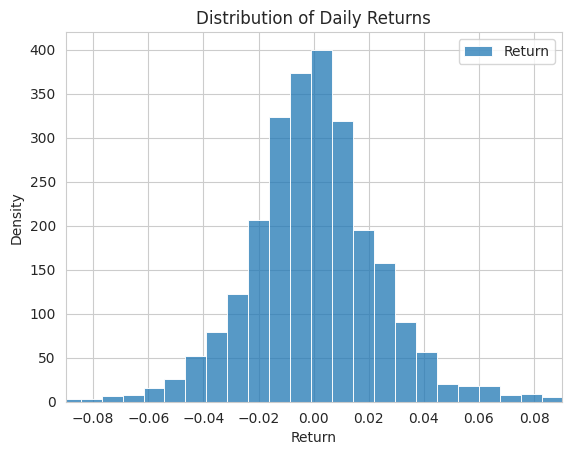

In [ ]:
sns.histplot(returns[1:], bins=50,label='Return')
plt.xlabel('Return')
plt.ylabel('Density')
plt.title('Distribution of Daily Returns')
plt.legend()
plt.gca().set_xlim(-0.09, 0.09)
plt.show()

Most of the distribution of daily returns of TATA Motors stock is between -0.02 and 0.02 indicates that the stock's daily returns are relatively stable and do not experience large fluctuations. A high concentration of returns in a narrow range suggests that the stock's price changes relatively little from day to day.

In [ ]:
# Date With Lowest and Highest Returns
print(returns.idxmin())
print(returns.idxmax())

2019-02-08 00:00:00
2021-10-13 00:00:00


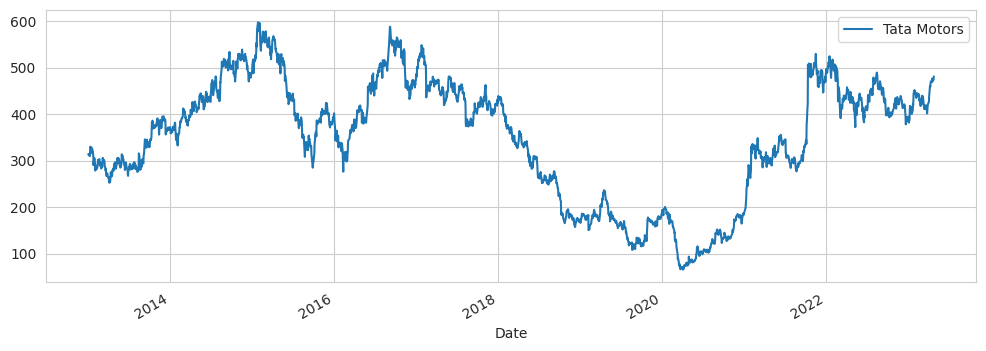

In [ ]:
Closed_price = df['Close']
Closed_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

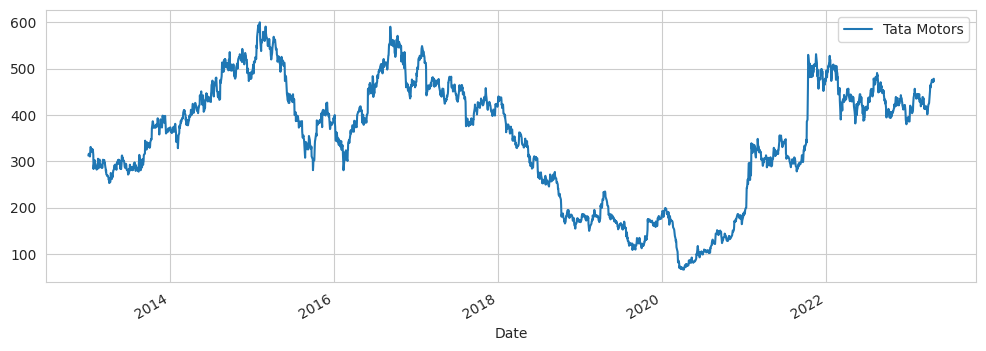

In [ ]:
Open_price = df['Open']
Open_price.plot(label="Tata Motors",figsize=(12,4))
plt.legend()

This Is Interactive Version Of Above Plot Using Plotly Iplot() Method.

<Axes: xlabel='Date'>

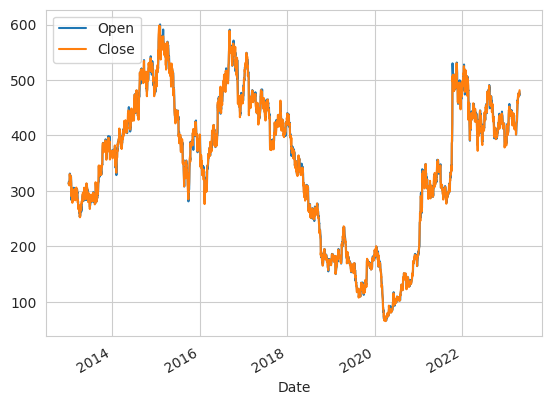

In [ ]:
df[['Open','Close']].plot()

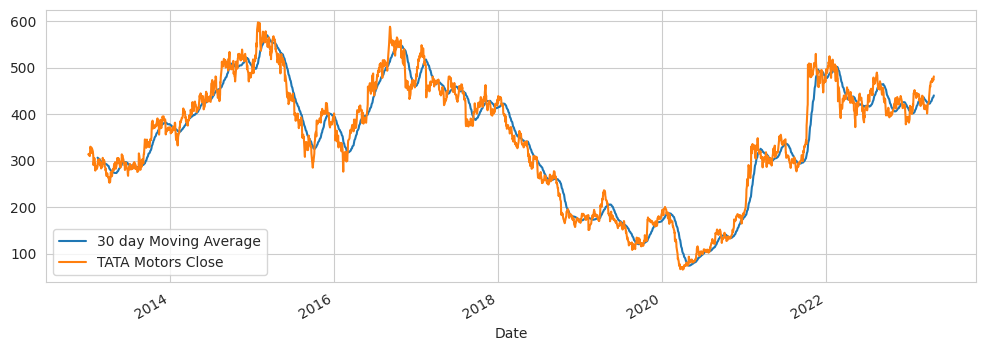

In [ ]:
plt.figure(figsize=(12,4))
df['Close'].rolling(window=30).mean().plot(label='30 day Moving Average')
df['Close'].plot(label='TATA Motors Close')
plt.legend()

<Axes: xlabel='Date'>

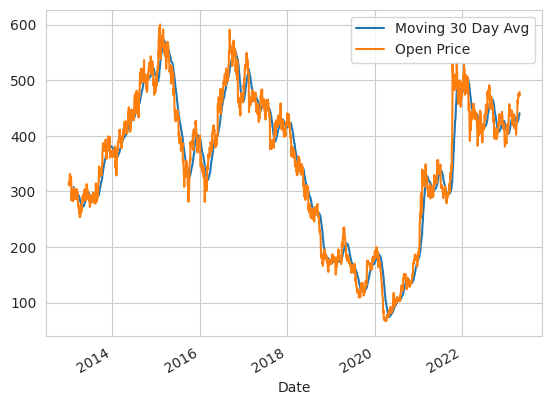

In [ ]:
Moving_Avg = df['Open'].rolling(window=30).mean()
New_df = pd.merge(Moving_Avg,Open_price,on = 'Date')
New_df.rename(columns = {'Open_x':'Moving 30 Day Avg'}, inplace = True)
New_df.rename(columns = {'Open_y':'Open Price'}, inplace = True)
New_df.plot()

30-day moving average and the closing price trendline are moving in the same direction on a long-term trend for TATA Motors stock, it means that the stock's average price over the past 30 days and the closing price trend are not aligned and this indicats not so strong trend in the stock's price movement.

<Axes: >

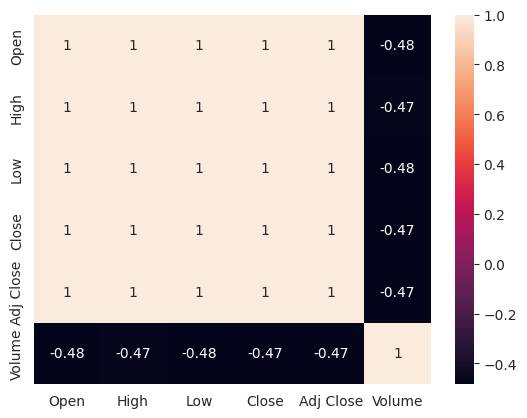

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Feature Engineering

In [ ]:
# Weekly Moving Average
df['ma_7'] = df['Close'].rolling(window=7).mean()

Moving averages are used in technical analysis to smooth out fluctuations in the stock price and identify trends over a longer time period. By calculating different moving averages with different time periods, traders and investors can identify different trends and determine the strength of those trends. For example, a 7-day moving average will give a quicker response to price changes compared to a 90-day moving average.

In [ ]:
# Bollinger Bands for a Close price

df['ma_20'] = df['Close'].rolling(window=20).mean()

df['std_20'] = df['Close'].rolling(window=20).std()

df['upper_band'] = df['ma_20'] + 2 * df['std_20']

df['lower_band'] = df['ma_20'] - 2 * df['std_20']

In [ ]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'ma_7', 'ma_20',
       'std_20', 'upper_band', 'lower_band'],
      dtype='object')

In [ ]:
df = df.drop(['High', 'Low','Adj Close', 'Volume'],axis=1)

In [ ]:
df.fillna(df.mean(), inplace=True)

In [ ]:
df.head()

,Open,Close,ma_7,ma_20,std_20,upper_band,lower_band
Date,,,,,,,
2013-01-01,312.646545,313.388580,348.368683,348.147078,13.655035,375.457147,320.837008
2013-01-02,315.120026,314.625336,348.368683,348.147078,13.655035,375.457147,320.837008
2013-01-03,316.604095,314.724274,348.368683,348.147078,13.655035,375.457147,320.837008
2013-01-04,315.120026,312.052917,348.368683,348.147078,13.655035,375.457147,320.837008
2013-01-07,314.427460,309.925751,348.368683,348.147078,13.655035,375.457147,320.837008


<Axes: >

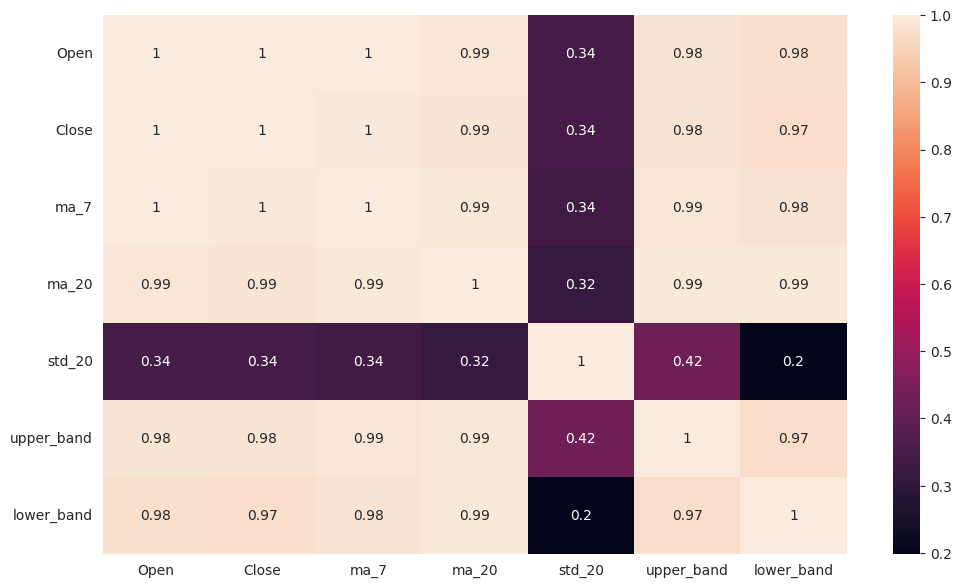

In [ ]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot=True)

The close price of the stock shows a strong correlation with its 7-day moving average, as well as with the upper and lower bands of Bollinger Bands. The change in percentage between the open and close prices is highly associated with the stock's momentum and log returns.

# Model Training

df_scaled = StandardScaler().fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)
df = df_scaled

In [ ]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

model_rf = RandomForestRegressor(n_jobs=-1)
model_rf.fit(X_train, y_train)

model_svr = SVR()
model_svr.fit(X_train, y_train)

SVR()

In [ ]:
y_predict_lr = model_lr.predict(X_test)
y_predict_rf = model_rf.predict(X_test)
y_predict_svr = model_svr.predict(X_test)

In [ ]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))
print("R2 score for random forest: ", r2_score(y_test, y_predict_rf))
print("R2 score for SVR: ", r2_score(y_test, y_predict_svr))

R2 score for linear regression:  0.9972921001045139
R2 score for random forest:  0.9966718908982507
R2 score for SVR:  0.9491069584215206


### Based on the model accuracy of 95.73%, it can be concluded that the Linear Regression model is the best suitable model for this data.

In [ ]:
y_test_predict = y_predict_lr
score = r2_score(y_test, y_test_predict)
mse = mean_squared_error(y_test, y_test_predict)
mae = mean_absolute_error(y_test, y_test_predict)
rmse = np.sqrt(mean_squared_error(y_test, y_test_predict))
print("R2_Score:",score)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

R2_Score: 0.9972921001045139
MSE: 46.95212510198624
MAE: 4.935004715007448
RMSE: 6.852162074994012


In [ ]:
pd.options.display.float_format = '{:.13f}'.format
test_check = pd.DataFrame()
test_check['actual'] = y_test
test_check['prediction'] = y_test_predict
test_check['difference'] = y_test - y_test_predict
test_check.sort_index()

,actual,prediction,difference
Date,,,
2013-01-02,314.6253356933594,318.1513580979054,-3.5260224045460
2013-01-07,309.9257507324219,317.5314545334523,-7.6057038010304
2013-01-14,324.2223815917969,325.1326965988820,-0.9103150070851
2013-01-15,328.0315246582031,324.2803864182179,3.7511382399852
2013-01-21,319.8196105957031,323.8344025314992,-4.0147919357960
...,...,...,...
2023-04-06,437.6499938964844,424.8498902023976,12.8001036940868
2023-04-11,458.7000122070312,460.4162964523976,-1.7162842453664
2023-04-13,469.5000000000000,463.5373902023976,5.9626097976024


In [ ]:
score_lr = r2_score(y_test, y_predict_lr)
score_rf = r2_score(y_test, y_predict_rf)
score_svr = r2_score(y_test, y_predict_svr)

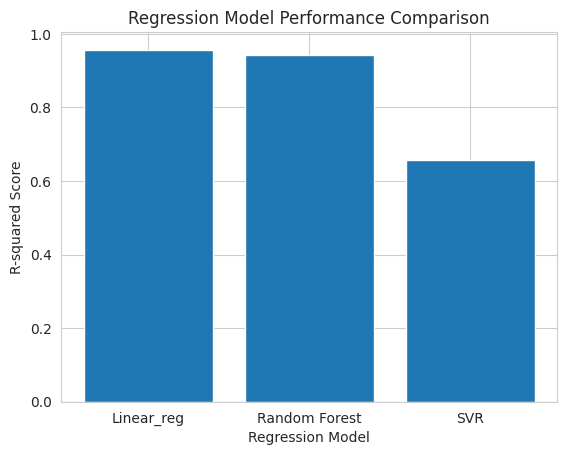

In [ ]:
plt.bar(['Linear_reg', 'Random Forest', 'SVR'],
        [score_lr, score_rf, score_svr])
plt.xlabel('Regression Model')
plt.ylabel('R-squared Score')
plt.title('Regression Model Performance Comparison')
plt.show()

In [ ]:
'''start_date = '2013-01-01'
end_date = '2023-04-28'
ticker = 'AMZN'
'''
df =pd.read_csv('/content/AMZN.csv',index_col = 0)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,12.8040000000000,12.9050000000000,12.6630000000000,12.8655000000000,12.8655000000000,65420000
2013-01-03,12.8635000000000,13.0440000000000,12.8185000000000,12.9240000000000,12.9240000000000,55018000
2013-01-04,12.8790000000000,12.9900000000000,12.8325000000000,12.9575000000000,12.9575000000000,37484000
2013-01-07,13.1485000000000,13.4865000000000,13.1335000000000,13.4230000000000,13.4230000000000,98200000
2013-01-08,13.3535000000000,13.4490000000000,13.1785000000000,13.3190000000000,13.3190000000000,60214000


In [ ]:
X = df.drop(['Close'], axis=1)
y = df['Close']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.transform(X_test)

In [ ]:
model_lr = LinearRegression(n_jobs=-1)
model_lr.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [ ]:
y_predict_lr = model_lr.predict(X_test)

In [ ]:
print("R2 score for linear regression: ", r2_score(y_test, y_predict_lr))

R2 score for linear regression:  1.0
